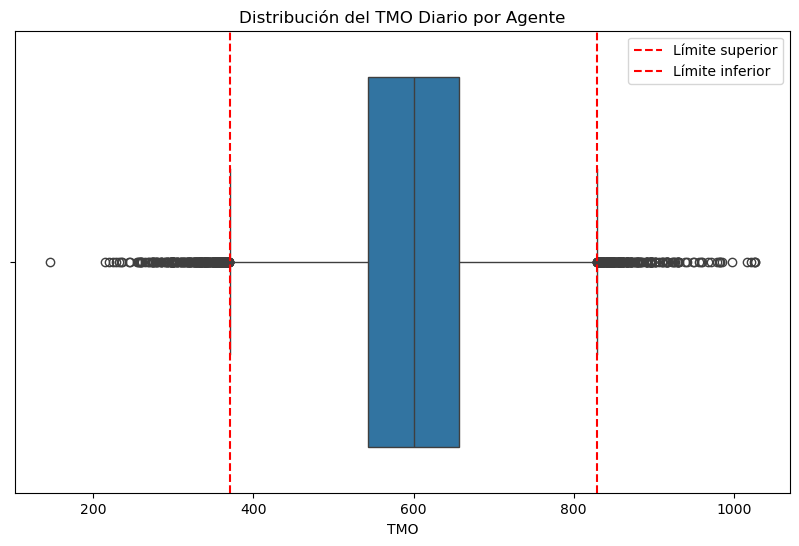

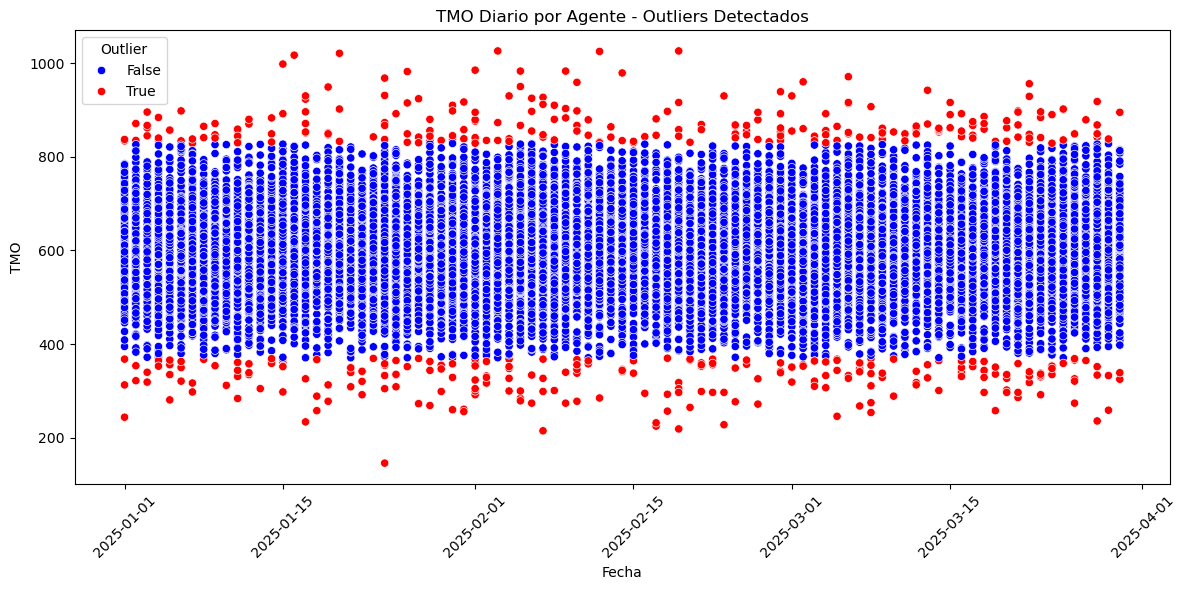

Agentes con alertas por TMO atípico (según IQR):
      Agente  Cantidad_alertas
0    EMP0280                 6
1    EMP0017                 6
2    EMP0110                 5
3    EMP0212                 4
4    EMP0108                 4
..       ...               ...
239  EMP0215                 1
240  EMP0074                 1
241  EMP0076                 1
242  EMP0120                 1
243  EMP0150                 1

[244 rows x 2 columns]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo desde tu ruta local
df = pd.read_excel(r"C:\Users\Interacciones.xlsx")

# Convertir fecha a datetime y extraer sólo la fecha
df['Fecha'] = pd.to_datetime(df['Fecha y hora de interacción']).dt.date

# Asegurar que la duración sea numérica
df['Duración'] = pd.to_numeric(df['Duración'], errors='coerce')

# Calcular TMO diario por agente
tmo_diario = df.groupby(['Id de empleado', 'Fecha'])['Duración'].agg(['sum', 'count']).reset_index()
tmo_diario['TMO'] = tmo_diario['sum'] / tmo_diario['count']
tmo_diario.rename(columns={'Id de empleado': 'Agente'}, inplace=True)

# Cálculo de IQR
Q1 = tmo_diario['TMO'].quantile(0.25)
Q3 = tmo_diario['TMO'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Detección de outliers
tmo_diario['Outlier'] = (tmo_diario['TMO'] < limite_inferior) | (tmo_diario['TMO'] > limite_superior)

# Tabla: Agentes con al menos un outlier
agentes_con_alertas = tmo_diario[tmo_diario['Outlier'] == True]['Agente'].value_counts().reset_index()
agentes_con_alertas.columns = ['Agente', 'Cantidad_alertas']

# --------- GRÁFICO 1: BOXPLOT del TMO ----------
plt.figure(figsize=(10, 6))
sns.boxplot(x=tmo_diario['TMO'])
plt.axvline(limite_superior, color='red', linestyle='--', label='Límite superior')
plt.axvline(limite_inferior, color='red', linestyle='--', label='Límite inferior')
plt.title('Distribución del TMO Diario por Agente')
plt.xlabel('TMO')
plt.legend()
plt.show()

# --------- GRÁFICO 2: SCATTERPLOT por Fecha ----------
plt.figure(figsize=(12, 6))
sns.scatterplot(data=tmo_diario, x='Fecha', y='TMO', hue='Outlier', palette={True: 'red', False: 'blue'})
plt.title('TMO Diario por Agente - Outliers Detectados')
plt.xlabel('Fecha')
plt.ylabel('TMO')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar tabla de agentes con alertas por IQR
print("Agentes con alertas por TMO atípico (según IQR):")
print(agentes_con_alertas)
